In [1]:
import pandas as pd
import pandas_profiling
from pandas_profiling import ProfileReport
import numpy as np
import matplotlib.pyplot as plt # for plotting
import seaborn as sns # for plotting
import scipy.stats as stats 
import requests

pd.set_option('display.max_columns', None) 

import warnings
warnings.filterwarnings("ignore")

In /Users/libingrui/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/libingrui/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/libingrui/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In /Users/libingrui/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In /Users/libingrui/anaconda3/lib/python3.7/

In [2]:
breast_cancer = pd.read_csv("breast_cancer_number_of_female_deaths.csv")
breast_cancer.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,761.0,817.0,894.0,989.0,1090.0,1180.0,1240.0,1290.0,1340.0,1400.0,1470.0,1550.0,1620.0,1700.0,1790.0,1880.0,1960.0,2020.0,2090.0,2150.0,2220.0,2280.0,2340.0,2420.0,2510.0,2600.0,2690.0
1,Albania,100.0,103.0,105.0,108.0,111.0,116.0,120.0,126.0,134.0,143.0,150.0,158.0,167.0,179.0,188.0,196.0,203.0,206.0,212.0,214.0,215.0,215.0,215.0,217.0,219.0,221.0,222.0
2,Algeria,701.0,729.0,789.0,852.0,920.0,999.0,1010.0,1040.0,1060.0,1110.0,1150.0,1190.0,1270.0,1340.0,1430.0,1560.0,1650.0,1700.0,1760.0,1840.0,1910.0,1980.0,2060.0,2150.0,2240.0,2320.0,2390.0
3,Andorra,9.8,10.5,11.1,11.9,12.5,11.9,11.7,11.5,11.4,11.2,11.0,10.8,10.8,11.1,12.1,12.4,12.8,13.2,13.7,14.3,14.6,14.9,15.2,15.4,15.7,15.9,16.0
4,Angola,420.0,432.0,445.0,477.0,513.0,538.0,548.0,554.0,603.0,612.0,624.0,646.0,667.0,706.0,741.0,768.0,796.0,814.0,835.0,852.0,867.0,885.0,909.0,939.0,968.0,1000.0,1030.0


In [3]:
data = pd.melt(breast_cancer,id_vars=['country'])
data.rename(columns={"value":"breast_cancer_number_of_female_deaths"},inplace=True)
data.head()

,country,variable,breast_cancer_number_of_female_deaths
0,Afghanistan,1990,761.0
1,Albania,1990,100.0
2,Algeria,1990,701.0
3,Andorra,1990,9.8
4,Angola,1990,420.0


In [4]:
cervical_cancer = pd.read_csv("cervical_cancer_number_of_female_deaths.csv")
cervical_cancer.head()

,country,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,Afghanistan,317.00,336.00,362.00,394.0,428.00,457.00,476.00,490.00,502.0,516.00,535.00,554.0,568.00,585.0,603.00,617.00,628.00,634.0,642.00,646.00,654.00,661.00,672.00,687.0,702.00,718.00,737.00
1,Albania,44.30,44.50,44.50,44.1,45.10,46.30,47.70,49.50,50.0,51.70,52.60,54.0,56.30,57.7,60.00,62.60,64.40,64.9,65.30,65.90,65.30,64.30,63.80,63.7,63.70,63.70,63.60
2,Algeria,434.00,444.00,441.00,443.0,446.00,455.00,438.00,425.00,411.0,412.00,416.00,416.0,418.00,424.0,457.00,493.00,523.00,523.0,529.00,538.00,546.00,552.00,559.00,564.0,570.00,585.00,602.00
3,Andorra,1.37,1.45,1.51,1.6,1.65,1.55,1.49,1.44,1.4,1.36,1.33,1.3,1.28,1.3,1.41,1.43,1.47,1.5,1.55,1.62,1.64,1.66,1.68,1.7,1.72,1.73,1.73
4,Angola,801.00,816.00,835.00,889.0,949.00,986.00,995.00,994.00,1080.0,1080.00,1100.00,1120.0,1150.00,1200.0,1240.00,1260.00,1290.00,1300.0,1310.00,1320.00,1320.00,1330.00,1340.00,1350.0,1370.00,1380.00,1400.00


In [5]:
data2 = pd.melt(cervical_cancer,id_vars=['country'])
data2.rename(columns={"value":"cervical_cancer_number_of_female_deaths"},inplace=True)
data2.head()

,country,variable,cervical_cancer_number_of_female_deaths
0,Afghanistan,1990,317.00
1,Albania,1990,44.30
2,Algeria,1990,434.00
3,Andorra,1990,1.37
4,Angola,1990,801.00


In [6]:
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths
0,Afghanistan,1990,761.0,317.00
1,Albania,1990,100.0,44.30
2,Algeria,1990,701.0,434.00
3,Andorra,1990,9.8,1.37
4,Angola,1990,420.0,801.00


In [7]:
colonandrectum_cancer_number_of_female_deaths = pd.read_csv("colonandrectum_cancer_number_of_female_deaths.csv")
data2 = pd.melt(colonandrectum_cancer_number_of_female_deaths,id_vars=['country'])
data2.rename(columns={"value":"colonandrectum_cancer_number_of_female_deaths"},inplace=True)
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths
0,Afghanistan,1990,761.0,317.00,289.00
1,Albania,1990,100.0,44.30,61.80
2,Algeria,1990,701.0,434.00,296.00
3,Andorra,1990,9.8,1.37,6.64
4,Angola,1990,420.0,801.00,173.00


In [8]:
liver_cancer_number_of_female_deaths = pd.read_csv("liver_cancer_number_of_female_deaths.csv")
data2 = pd.melt(liver_cancer_number_of_female_deaths,id_vars=['country'])
data2.rename(columns={"value":"liver_cancer_number_of_female_deaths"},inplace=True)
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths
0,Afghanistan,1990,761.0,317.00,289.00,119.00
1,Albania,1990,100.0,44.30,61.80,79.50
2,Algeria,1990,701.0,434.00,296.00,151.00
3,Andorra,1990,9.8,1.37,6.64,0.78
4,Angola,1990,420.0,801.00,173.00,156.00


In [9]:
lung_cancer_number_of_female_deaths = pd.read_csv("lung_cancer_number_of_female_deaths.csv")
data2 = pd.melt(lung_cancer_number_of_female_deaths,id_vars=['country'])
data2.rename(columns={"value":"lung_cancer_number_of_female_deaths"},inplace=True)
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths
0,Afghanistan,1990,761.0,317.00,289.00,119.00,220.00
1,Albania,1990,100.0,44.30,61.80,79.50,95.20
2,Algeria,1990,701.0,434.00,296.00,151.00,196.00
3,Andorra,1990,9.8,1.37,6.64,0.78,4.34
4,Angola,1990,420.0,801.00,173.00,156.00,125.00


In [10]:
stomach_cancer_number_of_female_deaths = pd.read_csv("stomach_cancer_number_of_female_deaths.csv")
data2 = pd.melt(stomach_cancer_number_of_female_deaths, id_vars=['country'])
data2.rename(columns={"value":"stomach_cancer_number_of_female_deaths"},inplace=True)
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths,stomach_cancer_number_of_female_deaths
0,Afghanistan,1990,761.0,317.00,289.00,119.00,220.00,441.00
1,Albania,1990,100.0,44.30,61.80,79.50,95.20,100.00
2,Algeria,1990,701.0,434.00,296.00,151.00,196.00,321.00
3,Andorra,1990,9.8,1.37,6.64,0.78,4.34,2.82
4,Angola,1990,420.0,801.00,173.00,156.00,125.00,187.00


In [11]:
colonandrectum_cancer_number_of_male_deaths = pd.read_csv("colonandrectum_cancer_number_of_male_deaths.csv")
data2 = pd.melt(colonandrectum_cancer_number_of_male_deaths, id_vars=['country'])
data2.rename(columns={"value":"colonandrectum_cancer_number_of_male_deaths"},inplace=True)
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths,stomach_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_male_deaths
0,Afghanistan,1990,761.0,317.00,289.00,119.00,220.00,441.00,153.00
1,Albania,1990,100.0,44.30,61.80,79.50,95.20,100.00,74.20
2,Algeria,1990,701.0,434.00,296.00,151.00,196.00,321.00,260.00
3,Andorra,1990,9.8,1.37,6.64,0.78,4.34,2.82,6.72
4,Angola,1990,420.0,801.00,173.00,156.00,125.00,187.00,149.00


In [12]:
liver_cancer_number_of_male_deaths = pd.read_csv("liver_cancer_number_of_male_deaths.csv")
data2 = pd.melt(liver_cancer_number_of_male_deaths, id_vars=['country'])
data2.rename(columns={"value":"liver_cancer_number_of_male_deaths"},inplace=True)
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths,stomach_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_male_deaths,liver_cancer_number_of_male_deaths
0,Afghanistan,1990,761.0,317.00,289.00,119.00,220.00,441.00,153.00,124.00
1,Albania,1990,100.0,44.30,61.80,79.50,95.20,100.00,74.20,149.00
2,Algeria,1990,701.0,434.00,296.00,151.00,196.00,321.00,260.00,215.00
3,Andorra,1990,9.8,1.37,6.64,0.78,4.34,2.82,6.72,1.25
4,Angola,1990,420.0,801.00,173.00,156.00,125.00,187.00,149.00,302.00


In [13]:
lung_cancer_number_of_male_deaths = pd.read_csv("lung_cancer_number_of_male_deaths.csv")
data2 = pd.melt(lung_cancer_number_of_male_deaths, id_vars=['country'])
data2.rename(columns={"value":"lung_cancer_number_of_male_deaths"},inplace=True)
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths,stomach_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_male_deaths,liver_cancer_number_of_male_deaths,lung_cancer_number_of_male_deaths
0,Afghanistan,1990,761.0,317.00,289.00,119.00,220.00,441.00,153.00,124.00,577.0
1,Albania,1990,100.0,44.30,61.80,79.50,95.20,100.00,74.20,149.00,471.0
2,Algeria,1990,701.0,434.00,296.00,151.00,196.00,321.00,260.00,215.00,1150.0
3,Andorra,1990,9.8,1.37,6.64,0.78,4.34,2.82,6.72,1.25,13.7
4,Angola,1990,420.0,801.00,173.00,156.00,125.00,187.00,149.00,302.00,268.0


In [14]:
stomach_cancer_number_of_male_deaths = pd.read_csv("stomach_cancer_number_of_male_deaths.csv")
data2 = pd.melt(stomach_cancer_number_of_male_deaths, id_vars=['country'])
data2.rename(columns={"value":"stomach_cancer_number_of_male_deaths"},inplace=True)
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths,stomach_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_male_deaths,liver_cancer_number_of_male_deaths,lung_cancer_number_of_male_deaths,stomach_cancer_number_of_male_deaths
0,Afghanistan,1990,761.0,317.00,289.00,119.00,220.00,441.00,153.00,124.00,577.0,482.00
1,Albania,1990,100.0,44.30,61.80,79.50,95.20,100.00,74.20,149.00,471.0,207.00
2,Algeria,1990,701.0,434.00,296.00,151.00,196.00,321.00,260.00,215.00,1150.0,650.00
3,Andorra,1990,9.8,1.37,6.64,0.78,4.34,2.82,6.72,1.25,13.7,4.02
4,Angola,1990,420.0,801.00,173.00,156.00,125.00,187.00,149.00,302.00,268.0,283.00


In [15]:
government_health_spending_of_total_gov_spending_percent = pd.read_csv("government_health_spending_of_total_gov_spending_percent.csv")
data2 = pd.melt(government_health_spending_of_total_gov_spending_percent, id_vars=['country'])
data2.rename(columns={"value":"government_health_spending_of_total_gov_spending_percent"},inplace=True)
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths,stomach_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_male_deaths,liver_cancer_number_of_male_deaths,lung_cancer_number_of_male_deaths,stomach_cancer_number_of_male_deaths,government_health_spending_of_total_gov_spending_percent
0,Afghanistan,1990,761.0,317.00,289.00,119.00,220.00,441.00,153.00,124.00,577.0,482.00,NaN
1,Albania,1990,100.0,44.30,61.80,79.50,95.20,100.00,74.20,149.00,471.0,207.00,NaN
2,Algeria,1990,701.0,434.00,296.00,151.00,196.00,321.00,260.00,215.00,1150.0,650.00,NaN
3,Andorra,1990,9.8,1.37,6.64,0.78,4.34,2.82,6.72,1.25,13.7,4.02,NaN
4,Angola,1990,420.0,801.00,173.00,156.00,125.00,187.00,149.00,302.00,268.0,283.00,NaN


In [16]:
medical_doctors_per_1000_people = pd.read_csv("medical_doctors_per_1000_people.csv")
data2 = pd.melt(medical_doctors_per_1000_people, id_vars=['country'])
data2.rename(columns={"value":"medical_doctors_per_1000_people"},inplace=True)
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths,stomach_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_male_deaths,liver_cancer_number_of_male_deaths,lung_cancer_number_of_male_deaths,stomach_cancer_number_of_male_deaths,government_health_spending_of_total_gov_spending_percent,medical_doctors_per_1000_people
0,Afghanistan,1990,761.0,317.00,289.00,119.00,220.00,441.00,153.00,124.00,577.0,482.00,NaN,0.109
1,Albania,1990,100.0,44.30,61.80,79.50,95.20,100.00,74.20,149.00,471.0,207.00,NaN,1.370
2,Algeria,1990,701.0,434.00,296.00,151.00,196.00,321.00,260.00,215.00,1150.0,650.00,NaN,0.942
3,Andorra,1990,9.8,1.37,6.64,0.78,4.34,2.82,6.72,1.25,13.7,4.02,NaN,NaN
4,Angola,1990,420.0,801.00,173.00,156.00,125.00,187.00,149.00,302.00,268.0,283.00,NaN,0.042


In [17]:
children_per_woman_total_fertility = pd.read_csv("children_per_woman_total_fertility.csv")
data2 = pd.melt(children_per_woman_total_fertility, id_vars=['country'])
data2.rename(columns={"value":"children_per_woman_total_fertility"},inplace=True)
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths,stomach_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_male_deaths,liver_cancer_number_of_male_deaths,lung_cancer_number_of_male_deaths,stomach_cancer_number_of_male_deaths,government_health_spending_of_total_gov_spending_percent,medical_doctors_per_1000_people,children_per_woman_total_fertility
0,Afghanistan,1990,761.0,317.00,289.00,119.00,220.00,441.00,153.00,124.00,577.0,482.00,NaN,0.109,7.47
1,Albania,1990,100.0,44.30,61.80,79.50,95.20,100.00,74.20,149.00,471.0,207.00,NaN,1.370,2.98
2,Algeria,1990,701.0,434.00,296.00,151.00,196.00,321.00,260.00,215.00,1150.0,650.00,NaN,0.942,4.73
3,Andorra,1990,9.8,1.37,6.64,0.78,4.34,2.82,6.72,1.25,13.7,4.02,NaN,NaN,NaN
4,Angola,1990,420.0,801.00,173.00,156.00,125.00,187.00,149.00,302.00,268.0,283.00,NaN,0.042,7.25


In [18]:
births_attended_by_skilled_health_staff_percent_of_total = pd.read_csv("births_attended_by_skilled_health_staff_percent_of_total.csv")
data2 = pd.melt(births_attended_by_skilled_health_staff_percent_of_total, id_vars=['country'])
data2.rename(columns={"value":"births_attended_by_skilled_health_staff_percent_of_total"},inplace=True)
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths,stomach_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_male_deaths,liver_cancer_number_of_male_deaths,lung_cancer_number_of_male_deaths,stomach_cancer_number_of_male_deaths,government_health_spending_of_total_gov_spending_percent,medical_doctors_per_1000_people,children_per_woman_total_fertility,births_attended_by_skilled_health_staff_percent_of_total
0,Afghanistan,1990,761.0,317.00,289.00,119.00,220.00,441.00,153.00,124.00,577.0,482.00,NaN,0.109,7.47,NaN
1,Albania,1990,100.0,44.30,61.80,79.50,95.20,100.00,74.20,149.00,471.0,207.00,NaN,1.370,2.98,0.93
2,Algeria,1990,701.0,434.00,296.00,151.00,196.00,321.00,260.00,215.00,1150.0,650.00,NaN,0.942,4.73,NaN
3,Andorra,1990,9.8,1.37,6.64,0.78,4.34,2.82,6.72,1.25,13.7,4.02,NaN,NaN,NaN,NaN
4,Angola,1990,420.0,801.00,173.00,156.00,125.00,187.00,149.00,302.00,268.0,283.00,NaN,0.042,7.25,NaN


In [19]:
contraceptive_use_percent_of_women_ages_15_49 = pd.read_csv("contraceptive_use_percent_of_women_ages_15_49.csv")
data2 = pd.melt(contraceptive_use_percent_of_women_ages_15_49, id_vars=['country'])
data2.rename(columns={"value":"contraceptive_use_percent_of_women_ages_15_49"},inplace=True)
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths,stomach_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_male_deaths,liver_cancer_number_of_male_deaths,lung_cancer_number_of_male_deaths,stomach_cancer_number_of_male_deaths,government_health_spending_of_total_gov_spending_percent,medical_doctors_per_1000_people,children_per_woman_total_fertility,births_attended_by_skilled_health_staff_percent_of_total,contraceptive_use_percent_of_women_ages_15_49
0,Afghanistan,1990,761.0,317.00,289.00,119.00,220.00,441.00,153.00,124.00,577.0,482.00,NaN,0.109,7.47,NaN,NaN
1,Albania,1990,100.0,44.30,61.80,79.50,95.20,100.00,74.20,149.00,471.0,207.00,NaN,1.370,2.98,0.93,NaN
2,Algeria,1990,701.0,434.00,296.00,151.00,196.00,321.00,260.00,215.00,1150.0,650.00,NaN,0.942,4.73,NaN,NaN
3,Andorra,1990,9.8,1.37,6.64,0.78,4.34,2.82,6.72,1.25,13.7,4.02,NaN,NaN,NaN,NaN,NaN
4,Angola,1990,420.0,801.00,173.00,156.00,125.00,187.00,149.00,302.00,268.0,283.00,NaN,0.042,7.25,NaN,NaN


In [20]:
maternal_deaths_total_number = pd.read_csv("maternal_deaths_total_number.csv")
data2 = pd.melt(maternal_deaths_total_number, id_vars=['country'])
data2.rename(columns={"value":"maternal_deaths_total_number"},inplace=True)
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths,stomach_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_male_deaths,liver_cancer_number_of_male_deaths,lung_cancer_number_of_male_deaths,stomach_cancer_number_of_male_deaths,government_health_spending_of_total_gov_spending_percent,medical_doctors_per_1000_people,children_per_woman_total_fertility,births_attended_by_skilled_health_staff_percent_of_total,contraceptive_use_percent_of_women_ages_15_49,maternal_deaths_total_number
0,Afghanistan,1990,761.0,317.00,289.00,119.00,220.00,441.00,153.00,124.00,577.0,482.00,NaN,0.109,7.47,NaN,NaN,7520.0
1,Albania,1990,100.0,44.30,61.80,79.50,95.20,100.00,74.20,149.00,471.0,207.00,NaN,1.370,2.98,0.93,NaN,24.0
2,Algeria,1990,701.0,434.00,296.00,151.00,196.00,321.00,260.00,215.00,1150.0,650.00,NaN,0.942,4.73,NaN,NaN,1330.0
3,Andorra,1990,9.8,1.37,6.64,0.78,4.34,2.82,6.72,1.25,13.7,4.02,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,1990,420.0,801.00,173.00,156.00,125.00,187.00,149.00,302.00,268.0,283.00,NaN,0.042,7.25,NaN,NaN,8280.0


In [21]:
stillbirths_per_1000_births = pd.read_csv("stillbirths_per_1000_births.csv")
data2 = pd.melt(stillbirths_per_1000_births, id_vars=['country'])
data2.rename(columns={"value":"stillbirths_per_1000_births"},inplace=True)
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths,stomach_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_male_deaths,liver_cancer_number_of_male_deaths,lung_cancer_number_of_male_deaths,stomach_cancer_number_of_male_deaths,government_health_spending_of_total_gov_spending_percent,medical_doctors_per_1000_people,children_per_woman_total_fertility,births_attended_by_skilled_health_staff_percent_of_total,contraceptive_use_percent_of_women_ages_15_49,maternal_deaths_total_number,stillbirths_per_1000_births
0,Afghanistan,1990,761.0,317.00,289.00,119.00,220.00,441.00,153.00,124.00,577.0,482.00,NaN,0.109,7.47,NaN,NaN,7520.0,NaN
1,Albania,1990,100.0,44.30,61.80,79.50,95.20,100.00,74.20,149.00,471.0,207.00,NaN,1.370,2.98,0.93,NaN,24.0,NaN
2,Algeria,1990,701.0,434.00,296.00,151.00,196.00,321.00,260.00,215.00,1150.0,650.00,NaN,0.942,4.73,NaN,NaN,1330.0,NaN
3,Andorra,1990,9.8,1.37,6.64,0.78,4.34,2.82,6.72,1.25,13.7,4.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Angola,1990,420.0,801.00,173.00,156.00,125.00,187.00,149.00,302.00,268.0,283.00,NaN,0.042,7.25,NaN,NaN,8280.0,NaN


In [22]:
body_mass_index_bmi_men_kgperm2 = pd.read_csv("body_mass_index_bmi_men_kgperm2.csv")
data2 = pd.melt(body_mass_index_bmi_men_kgperm2, id_vars=['country'])
data2.rename(columns={"value":"body_mass_index_bmi_men_kgperm2"},inplace=True)
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths,stomach_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_male_deaths,liver_cancer_number_of_male_deaths,lung_cancer_number_of_male_deaths,stomach_cancer_number_of_male_deaths,government_health_spending_of_total_gov_spending_percent,medical_doctors_per_1000_people,children_per_woman_total_fertility,births_attended_by_skilled_health_staff_percent_of_total,contraceptive_use_percent_of_women_ages_15_49,maternal_deaths_total_number,stillbirths_per_1000_births,body_mass_index_bmi_men_kgperm2
0,Afghanistan,1990,761.0,317.00,289.00,119.00,220.00,441.00,153.00,124.00,577.0,482.00,NaN,0.109,7.47,NaN,NaN,7520.0,NaN,21.3
1,Albania,1990,100.0,44.30,61.80,79.50,95.20,100.00,74.20,149.00,471.0,207.00,NaN,1.370,2.98,0.93,NaN,24.0,NaN,25.3
2,Algeria,1990,701.0,434.00,296.00,151.00,196.00,321.00,260.00,215.00,1150.0,650.00,NaN,0.942,4.73,NaN,NaN,1330.0,NaN,23.1
3,Andorra,1990,9.8,1.37,6.64,0.78,4.34,2.82,6.72,1.25,13.7,4.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.1
4,Angola,1990,420.0,801.00,173.00,156.00,125.00,187.00,149.00,302.00,268.0,283.00,NaN,0.042,7.25,NaN,NaN,8280.0,NaN,21.1


In [23]:
body_mass_index_bmi_women_kgperm2 = pd.read_csv("body_mass_index_bmi_women_kgperm2.csv")
data2 = pd.melt(body_mass_index_bmi_women_kgperm2, id_vars=['country'])
data2.rename(columns={"value":"body_mass_index_bmi_women_kgperm2"},inplace=True)
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths,stomach_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_male_deaths,liver_cancer_number_of_male_deaths,lung_cancer_number_of_male_deaths,stomach_cancer_number_of_male_deaths,government_health_spending_of_total_gov_spending_percent,medical_doctors_per_1000_people,children_per_woman_total_fertility,births_attended_by_skilled_health_staff_percent_of_total,contraceptive_use_percent_of_women_ages_15_49,maternal_deaths_total_number,stillbirths_per_1000_births,body_mass_index_bmi_men_kgperm2,body_mass_index_bmi_women_kgperm2
0,Afghanistan,1990,761.0,317.00,289.00,119.00,220.00,441.00,153.00,124.00,577.0,482.00,NaN,0.109,7.47,NaN,NaN,7520.0,NaN,21.3,20.7
1,Albania,1990,100.0,44.30,61.80,79.50,95.20,100.00,74.20,149.00,471.0,207.00,NaN,1.370,2.98,0.93,NaN,24.0,NaN,25.3,25.1
2,Algeria,1990,701.0,434.00,296.00,151.00,196.00,321.00,260.00,215.00,1150.0,650.00,NaN,0.942,4.73,NaN,NaN,1330.0,NaN,23.1,24.7
3,Andorra,1990,9.8,1.37,6.64,0.78,4.34,2.82,6.72,1.25,13.7,4.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.1,25.8
4,Angola,1990,420.0,801.00,173.00,156.00,125.00,187.00,149.00,302.00,268.0,283.00,NaN,0.042,7.25,NaN,NaN,8280.0,NaN,21.1,20.9


In [24]:
female_agriculture_workers_percent_of_female_employment = pd.read_csv("female_agriculture_workers_percent_of_female_employment.csv")
data2 = pd.melt(female_agriculture_workers_percent_of_female_employment, id_vars=['country'])
data2.rename(columns={"value":"female_agriculture_workers_percent_of_female_employment"},inplace=True)
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths,stomach_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_male_deaths,liver_cancer_number_of_male_deaths,lung_cancer_number_of_male_deaths,stomach_cancer_number_of_male_deaths,government_health_spending_of_total_gov_spending_percent,medical_doctors_per_1000_people,children_per_woman_total_fertility,births_attended_by_skilled_health_staff_percent_of_total,contraceptive_use_percent_of_women_ages_15_49,maternal_deaths_total_number,stillbirths_per_1000_births,body_mass_index_bmi_men_kgperm2,body_mass_index_bmi_women_kgperm2,female_agriculture_workers_percent_of_female_employment
0,Afghanistan,1990,761.0,317.00,289.00,119.00,220.00,441.00,153.00,124.00,577.0,482.00,NaN,0.109,7.47,NaN,NaN,7520.0,NaN,21.3,20.7,NaN
1,Albania,1990,100.0,44.30,61.80,79.50,95.20,100.00,74.20,149.00,471.0,207.00,NaN,1.370,2.98,0.93,NaN,24.0,NaN,25.3,25.1,NaN
2,Algeria,1990,701.0,434.00,296.00,151.00,196.00,321.00,260.00,215.00,1150.0,650.00,NaN,0.942,4.73,NaN,NaN,1330.0,NaN,23.1,24.7,NaN
3,Andorra,1990,9.8,1.37,6.64,0.78,4.34,2.82,6.72,1.25,13.7,4.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.1,25.8,NaN
4,Angola,1990,420.0,801.00,173.00,156.00,125.00,187.00,149.00,302.00,268.0,283.00,NaN,0.042,7.25,NaN,NaN,8280.0,NaN,21.1,20.9,NaN


In [25]:
male_agriculture_workers_percent_of_male_employment = pd.read_csv("male_agriculture_workers_percent_of_male_employment.csv")
data2 = pd.melt(male_agriculture_workers_percent_of_male_employment, id_vars=['country'])
data2.rename(columns={"value":"male_agriculture_workers_percent_of_male_employment"},inplace=True)
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths,stomach_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_male_deaths,liver_cancer_number_of_male_deaths,lung_cancer_number_of_male_deaths,stomach_cancer_number_of_male_deaths,government_health_spending_of_total_gov_spending_percent,medical_doctors_per_1000_people,children_per_woman_total_fertility,births_attended_by_skilled_health_staff_percent_of_total,contraceptive_use_percent_of_women_ages_15_49,maternal_deaths_total_number,stillbirths_per_1000_births,body_mass_index_bmi_men_kgperm2,body_mass_index_bmi_women_kgperm2,female_agriculture_workers_percent_of_female_employment,male_agriculture_workers_percent_of_male_employment
0,Afghanistan,1990,761.0,317.00,289.00,119.00,220.00,441.00,153.00,124.00,577.0,482.00,NaN,0.109,7.47,NaN,NaN,7520.0,NaN,21.3,20.7,NaN,NaN
1,Albania,1990,100.0,44.30,61.80,79.50,95.20,100.00,74.20,149.00,471.0,207.00,NaN,1.370,2.98,0.93,NaN,24.0,NaN,25.3,25.1,NaN,NaN
2,Algeria,1990,701.0,434.00,296.00,151.00,196.00,321.00,260.00,215.00,1150.0,650.00,NaN,0.942,4.73,NaN,NaN,1330.0,NaN,23.1,24.7,NaN,NaN
3,Andorra,1990,9.8,1.37,6.64,0.78,4.34,2.82,6.72,1.25,13.7,4.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.1,25.8,NaN,NaN
4,Angola,1990,420.0,801.00,173.00,156.00,125.00,187.00,149.00,302.00,268.0,283.00,NaN,0.042,7.25,NaN,NaN,8280.0,NaN,21.1,20.9,NaN,NaN


In [26]:
literacy_rate_adult_female_percent_of_females_ages_15_above = pd.read_csv("literacy_rate_adult_female_percent_of_females_ages_15_above.csv")
data2 = pd.melt(literacy_rate_adult_female_percent_of_females_ages_15_above, id_vars=['country'])
data2.rename(columns={"value":"literacy_rate_adult_female_percent_of_females_ages_15_above"},inplace=True)
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths,stomach_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_male_deaths,liver_cancer_number_of_male_deaths,lung_cancer_number_of_male_deaths,stomach_cancer_number_of_male_deaths,government_health_spending_of_total_gov_spending_percent,medical_doctors_per_1000_people,children_per_woman_total_fertility,births_attended_by_skilled_health_staff_percent_of_total,contraceptive_use_percent_of_women_ages_15_49,maternal_deaths_total_number,stillbirths_per_1000_births,body_mass_index_bmi_men_kgperm2,body_mass_index_bmi_women_kgperm2,female_agriculture_workers_percent_of_female_employment,male_agriculture_workers_percent_of_male_employment,literacy_rate_adult_female_percent_of_females_ages_15_above
0,Afghanistan,1990,761.0,317.00,289.00,119.00,220.00,441.00,153.00,124.00,577.0,482.00,NaN,0.109,7.47,NaN,NaN,7520.0,NaN,21.3,20.7,NaN,NaN,NaN
1,Albania,1990,100.0,44.30,61.80,79.50,95.20,100.00,74.20,149.00,471.0,207.00,NaN,1.370,2.98,0.93,NaN,24.0,NaN,25.3,25.1,NaN,NaN,NaN
2,Algeria,1990,701.0,434.00,296.00,151.00,196.00,321.00,260.00,215.00,1150.0,650.00,NaN,0.942,4.73,NaN,NaN,1330.0,NaN,23.1,24.7,NaN,NaN,NaN
3,Andorra,1990,9.8,1.37,6.64,0.78,4.34,2.82,6.72,1.25,13.7,4.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.1,25.8,NaN,NaN,NaN
4,Angola,1990,420.0,801.00,173.00,156.00,125.00,187.00,149.00,302.00,268.0,283.00,NaN,0.042,7.25,NaN,NaN,8280.0,NaN,21.1,20.9,NaN,NaN,NaN


In [27]:
population_total = pd.read_csv("population_total.csv")
data2 = pd.melt(population_total, id_vars=['country'])
data2.rename(columns={"value":"population_total"},inplace=True)
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths,stomach_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_male_deaths,liver_cancer_number_of_male_deaths,lung_cancer_number_of_male_deaths,stomach_cancer_number_of_male_deaths,government_health_spending_of_total_gov_spending_percent,medical_doctors_per_1000_people,children_per_woman_total_fertility,births_attended_by_skilled_health_staff_percent_of_total,contraceptive_use_percent_of_women_ages_15_49,maternal_deaths_total_number,stillbirths_per_1000_births,body_mass_index_bmi_men_kgperm2,body_mass_index_bmi_women_kgperm2,female_agriculture_workers_percent_of_female_employment,male_agriculture_workers_percent_of_male_employment,literacy_rate_adult_female_percent_of_females_ages_15_above,population_total
0,Afghanistan,1990,761.0,317.00,289.00,119.00,220.00,441.00,153.00,124.00,577.0,482.00,NaN,0.109,7.47,NaN,NaN,7520.0,NaN,21.3,20.7,NaN,NaN,NaN,12400000.0
1,Albania,1990,100.0,44.30,61.80,79.50,95.20,100.00,74.20,149.00,471.0,207.00,NaN,1.370,2.98,0.93,NaN,24.0,NaN,25.3,25.1,NaN,NaN,NaN,3290000.0
2,Algeria,1990,701.0,434.00,296.00,151.00,196.00,321.00,260.00,215.00,1150.0,650.00,NaN,0.942,4.73,NaN,NaN,1330.0,NaN,23.1,24.7,NaN,NaN,NaN,25800000.0
3,Andorra,1990,9.8,1.37,6.64,0.78,4.34,2.82,6.72,1.25,13.7,4.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.1,25.8,NaN,NaN,NaN,54500.0
4,Angola,1990,420.0,801.00,173.00,156.00,125.00,187.00,149.00,302.00,268.0,283.00,NaN,0.042,7.25,NaN,NaN,8280.0,NaN,21.1,20.9,NaN,NaN,NaN,11800000.0


In [28]:
cervical_cancer_deaths_per_100000_women = pd.read_csv("cervical_cancer_deaths_per_100000_women.csv")
data2 = pd.melt(population_total, id_vars=['country'])
data2.rename(columns={"value":"cervical_cancer_deaths_per_100000_women"},inplace=True)
data = data.merge(data2,how="outer")
data.head()

,country,variable,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths,stomach_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_male_deaths,liver_cancer_number_of_male_deaths,lung_cancer_number_of_male_deaths,stomach_cancer_number_of_male_deaths,government_health_spending_of_total_gov_spending_percent,medical_doctors_per_1000_people,children_per_woman_total_fertility,births_attended_by_skilled_health_staff_percent_of_total,contraceptive_use_percent_of_women_ages_15_49,maternal_deaths_total_number,stillbirths_per_1000_births,body_mass_index_bmi_men_kgperm2,body_mass_index_bmi_women_kgperm2,female_agriculture_workers_percent_of_female_employment,male_agriculture_workers_percent_of_male_employment,literacy_rate_adult_female_percent_of_females_ages_15_above,population_total,cervical_cancer_deaths_per_100000_women
0,Afghanistan,1990,761.0,317.00,289.00,119.00,220.00,441.00,153.00,124.00,577.0,482.00,NaN,0.109,7.47,NaN,NaN,7520.0,NaN,21.3,20.7,NaN,NaN,NaN,12400000.0,12400000.0
1,Albania,1990,100.0,44.30,61.80,79.50,95.20,100.00,74.20,149.00,471.0,207.00,NaN,1.370,2.98,0.93,NaN,24.0,NaN,25.3,25.1,NaN,NaN,NaN,3290000.0,3290000.0
2,Algeria,1990,701.0,434.00,296.00,151.00,196.00,321.00,260.00,215.00,1150.0,650.00,NaN,0.942,4.73,NaN,NaN,1330.0,NaN,23.1,24.7,NaN,NaN,NaN,25800000.0,25800000.0
3,Andorra,1990,9.8,1.37,6.64,0.78,4.34,2.82,6.72,1.25,13.7,4.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.1,25.8,NaN,NaN,NaN,54500.0,54500.0
4,Angola,1990,420.0,801.00,173.00,156.00,125.00,187.00,149.00,302.00,268.0,283.00,NaN,0.042,7.25,NaN,NaN,8280.0,NaN,21.1,20.9,NaN,NaN,NaN,11800000.0,11800000.0


In [29]:
data.dtypes

country                                                         object
variable                                                        object
breast_cancer_number_of_female_deaths                          float64
cervical_cancer_number_of_female_deaths                        float64
colonandrectum_cancer_number_of_female_deaths                  float64
liver_cancer_number_of_female_deaths                           float64
lung_cancer_number_of_female_deaths                            float64
stomach_cancer_number_of_female_deaths                         float64
colonandrectum_cancer_number_of_male_deaths                    float64
liver_cancer_number_of_male_deaths                             float64
lung_cancer_number_of_male_deaths                              float64
stomach_cancer_number_of_male_deaths                           float64
government_health_spending_of_total_gov_spending_percent       float64
medical_doctors_per_1000_people                                float64
childr

In [30]:
data.rename(columns={"variable":"year"},inplace=True)

In [31]:
data.year = data.year.astype("int")

In [32]:
data.country = data.country.astype("category")

In [33]:
data.to_csv('data')

In [34]:
min_year = data.year.min()
max_year = data.year.max()
print(f"The data ranges from {min_year} to {max_year}.")

The data ranges from 1590 to 2100.


In [35]:
data.country.unique()

['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', ..., 'San Marino', 'St. Kitts and Nevis', 'Tuvalu', 'Holy See', 'Liechtenstein']
Length: 195
Categories (195, object): ['Afghanistan', 'Albania', 'Algeria', 'Andorra', ..., 'St. Kitts and Nevis', 'Tuvalu', 'Holy See', 'Liechtenstein']

In [36]:
(data.isna().sum(axis=0)/data.shape[0]).round(2)

country                                                        0.00
year                                                           0.00
breast_cancer_number_of_female_deaths                          0.95
cervical_cancer_number_of_female_deaths                        0.95
colonandrectum_cancer_number_of_female_deaths                  0.95
liver_cancer_number_of_female_deaths                           0.95
lung_cancer_number_of_female_deaths                            0.95
stomach_cancer_number_of_female_deaths                         0.95
colonandrectum_cancer_number_of_male_deaths                    0.95
liver_cancer_number_of_male_deaths                             0.95
lung_cancer_number_of_male_deaths                              0.95
stomach_cancer_number_of_male_deaths                           0.95
government_health_spending_of_total_gov_spending_percent       0.97
medical_doctors_per_1000_people                                0.95
children_per_woman_total_fertility              

sns.set_context("notebook", font_scale=2)
g = sns.relplot("year","country",
                kind="scatter",
                height=60,s=500,
                data=data)

df = data.assign(missing = np.where(data.stillbirths_per_1000_births.isna(),"Yes","No"))
sns.relplot("year","country",
            hue='missing',
            kind="scatter",
            height=60,s=500,
            palette = ["steelblue","darkred"],
            data = df)

df = data.assign(missing = np.where(data.breast_cancer_number_of_female_deaths.isna(),"Yes","No"))
sns.relplot("year","country",
            hue='missing',
            kind="scatter",
            height=60,s=500,
            palette = ["steelblue","darkred"],
            data = df)

In [37]:
data = data.query("year >= 1990")

In [38]:
data = data.query("year < 2020").reset_index()

In [39]:
(data.isna().sum(axis=0)/data.shape[0]).round(2)

index                                                          0.00
country                                                        0.00
year                                                           0.00
breast_cancer_number_of_female_deaths                          0.14
cervical_cancer_number_of_female_deaths                        0.14
colonandrectum_cancer_number_of_female_deaths                  0.14
liver_cancer_number_of_female_deaths                           0.14
lung_cancer_number_of_female_deaths                            0.14
stomach_cancer_number_of_female_deaths                         0.14
colonandrectum_cancer_number_of_male_deaths                    0.14
liver_cancer_number_of_male_deaths                             0.14
lung_cancer_number_of_male_deaths                              0.14
stomach_cancer_number_of_male_deaths                           0.14
government_health_spending_of_total_gov_spending_percent       0.49
medical_doctors_per_1000_people                 

In [40]:
data.shape

(5850, 27)

df = data.assign(missing = np.where(data.breast_cancer_number_of_female_deaths.isna(),"Yes","No"))
sns.relplot("year","country",
            hue='missing',
            kind="scatter",
            height=50,s=200,
            palette = ["steelblue","darkred"],
            data = df)

df = data.assign(missing = np.where(data.contraceptive_use_percent_of_women_ages_15_49.isna(),"Yes","No"))
sns.relplot("year","country",
            hue='missing',
            kind="scatter",
            height=50,s=200,
            palette = ["steelblue","darkred"],
            data = df)

In [41]:
data.describe(include="float").round(1).T

,count,mean,std,min,25%,50%,75%,max
breast_cancer_number_of_female_deaths,5049.0,2333.9,6620.9,1.6,108.0,450.0,1530.0,6.790000e+04
cervical_cancer_number_of_female_deaths,5049.0,1187.9,3699.7,1.2,65.5,287.0,867.0,3.910000e+04
colonandrectum_cancer_number_of_female_deaths,5049.0,1670.1,5317.4,0.5,51.5,230.0,937.0,6.290000e+04
liver_cancer_number_of_female_deaths,5049.0,1030.4,6932.6,0.4,32.2,137.0,413.0,1.030000e+05
lung_cancer_number_of_female_deaths,5049.0,2142.7,11077.6,0.5,38.0,170.0,759.0,1.670000e+05
stomach_cancer_number_of_female_deaths,5049.0,1640.5,8726.0,0.6,37.5,230.0,746.0,1.270000e+05
colonandrectum_cancer_number_of_male_deaths,5049.0,1803.5,6553.3,0.8,52.3,217.0,955.0,1.040000e+05
liver_cancer_number_of_male_deaths,5049.0,2413.2,19456.2,0.6,46.1,205.0,687.0,3.240000e+05
lung_cancer_number_of_male_deaths,5049.0,5105.9,24621.2,2.3,94.9,434.0,2140.0,4.240000e+05
stomach_cancer_number_of_male_deaths,5049.0,2724.4,17347.6,1.2,56.6,331.0,999.0,2.570000e+05


In [42]:
from pandas.plotting import scatter_matrix

df1 = data[['breast_cancer_number_of_female_deaths','population_total',
            'contraceptive_use_percent_of_women_ages_15_49']]
df1.rename(columns={"breast_cancer_number_of_female_deaths":"breast_cancer"},inplace=True)
df1.rename(columns={"population_total":"population"},inplace=True)
df1.rename(columns={"contraceptive_use_percent_of_women_ages_15_49":"contraceptive_use"},inplace=True)

scatter_matrix(df1, alpha=0.2, figsize=[10,10])

In [43]:
data.head()

,index,country,year,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths,stomach_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_male_deaths,liver_cancer_number_of_male_deaths,lung_cancer_number_of_male_deaths,stomach_cancer_number_of_male_deaths,government_health_spending_of_total_gov_spending_percent,medical_doctors_per_1000_people,children_per_woman_total_fertility,births_attended_by_skilled_health_staff_percent_of_total,contraceptive_use_percent_of_women_ages_15_49,maternal_deaths_total_number,stillbirths_per_1000_births,body_mass_index_bmi_men_kgperm2,body_mass_index_bmi_women_kgperm2,female_agriculture_workers_percent_of_female_employment,male_agriculture_workers_percent_of_male_employment,literacy_rate_adult_female_percent_of_females_ages_15_above,population_total,cervical_cancer_deaths_per_100000_women
0,0,Afghanistan,1990,761.0,317.00,289.00,119.00,220.00,441.00,153.00,124.00,577.0,482.00,NaN,0.109,7.47,NaN,NaN,7520.0,NaN,21.3,20.7,NaN,NaN,NaN,12400000.0,12400000.0
1,1,Albania,1990,100.0,44.30,61.80,79.50,95.20,100.00,74.20,149.00,471.0,207.00,NaN,1.370,2.98,0.93,NaN,24.0,NaN,25.3,25.1,NaN,NaN,NaN,3290000.0,3290000.0
2,2,Algeria,1990,701.0,434.00,296.00,151.00,196.00,321.00,260.00,215.00,1150.0,650.00,NaN,0.942,4.73,NaN,NaN,1330.0,NaN,23.1,24.7,NaN,NaN,NaN,25800000.0,25800000.0
3,3,Andorra,1990,9.8,1.37,6.64,0.78,4.34,2.82,6.72,1.25,13.7,4.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,26.1,25.8,NaN,NaN,NaN,54500.0,54500.0
4,4,Angola,1990,420.0,801.00,173.00,156.00,125.00,187.00,149.00,302.00,268.0,283.00,NaN,0.042,7.25,NaN,NaN,8280.0,NaN,21.1,20.9,NaN,NaN,NaN,11800000.0,11800000.0


In [44]:
min_year = data.year.min()
max_year = data.year.max()
print(f"The data ranges from {min_year} to {max_year}.")

The data ranges from 1990 to 2019.


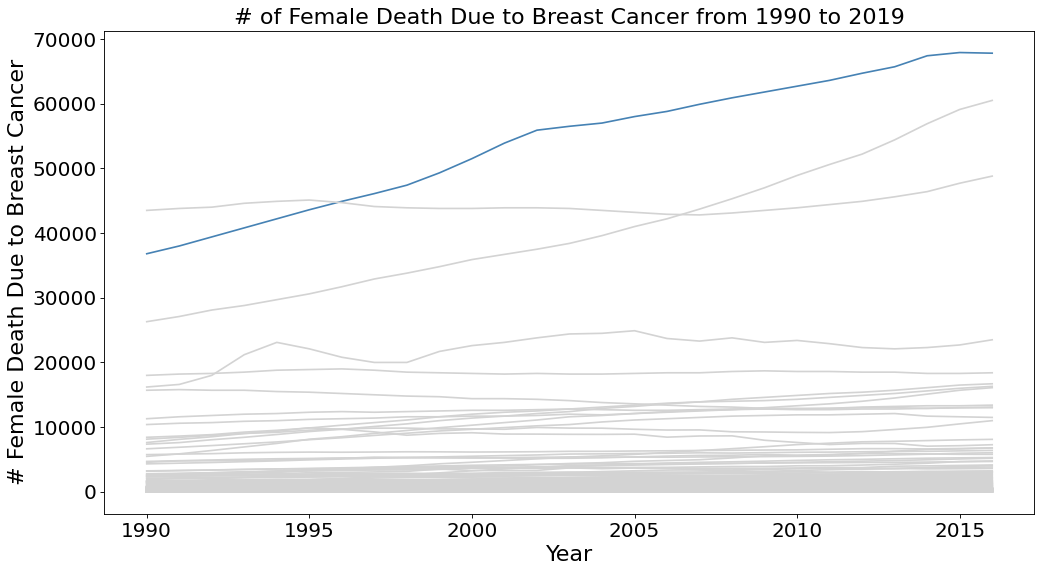

In [45]:
country_list = list(set(data['country']))


plt.style.use('tableau-colorblind10')
plt.figure(figsize=(15,8), dpi=80)

for c in country_list:
        
    if c =='China':
        temp = data[data['country']==c]
        plt.plot(temp['year'], temp['breast_cancer_number_of_female_deaths'], color='steelblue');

    else:
        temp = data[data['country']==c]
        plt.plot(temp['year'], temp['breast_cancer_number_of_female_deaths'], color='lightgrey');
        

# Altering Plot Labels
plt.xlabel('Year', fontsize=20) # Add x axis label
plt.ylabel('# Female Death Due to Breast Cancer', fontsize=20) # Add y axis label
plt.xticks(fontsize=18) # Change x tick mark size
plt.yticks(fontsize=18) # Change y tick mark size
plt.title('# of Female Death Due to Breast Cancer from 1990 to 2019', fontdict = {'fontsize' : 20}); # Add plot title

plt.savefig("Female Death Due to Breast Cancer from 1990 to 2019.png")

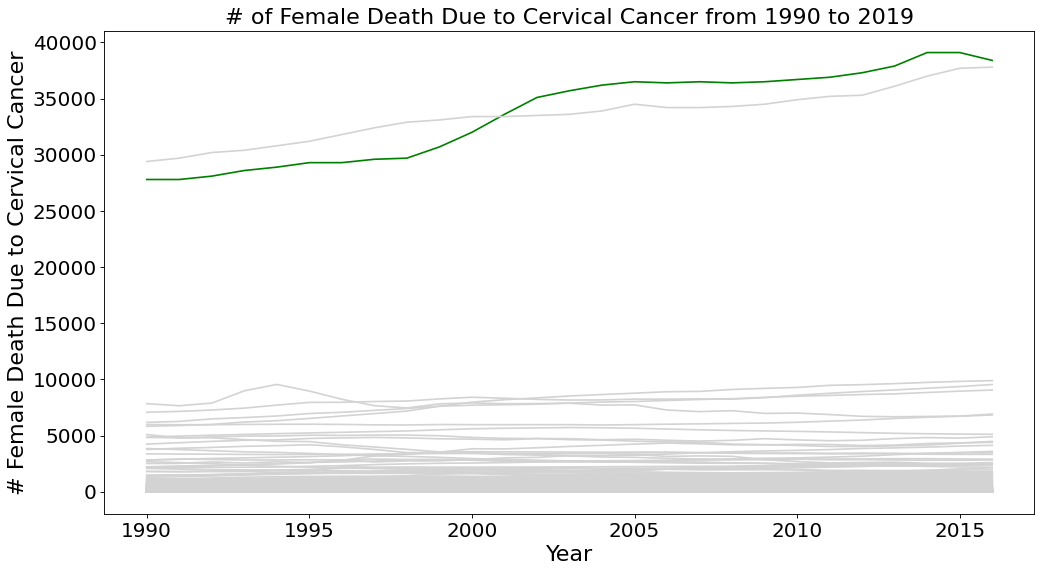

In [46]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(15,8), dpi=80)

for c in country_list:
        
    if c =='China':
        temp = data[data['country']==c]
        plt.plot(temp['year'], temp['cervical_cancer_number_of_female_deaths'], color='green');

    else:
        temp = data[data['country']==c]
        plt.plot(temp['year'], temp['cervical_cancer_number_of_female_deaths'], color='lightgrey');
        

# Altering Plot Labels
plt.xlabel('Year', fontsize=20) # Add x axis label
plt.ylabel('# Female Death Due to Cervical Cancer', fontsize=20) # Add y axis label
plt.xticks(fontsize=18) # Change x tick mark size
plt.yticks(fontsize=18) # Change y tick mark size
plt.title('# of Female Death Due to Cervical Cancer from 1990 to 2019', fontdict = {'fontsize' : 20}); # Add plot title

plt.savefig("Female Death Due to Cervical Cancer from 1990 to 2019.png")

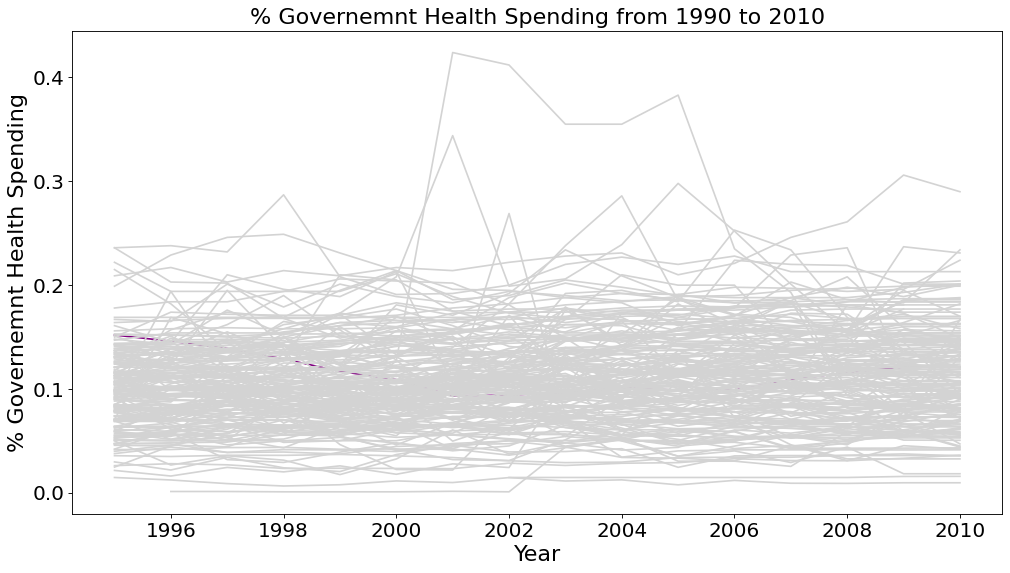

In [47]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(15,8), dpi=80)

for c in country_list:
        
    if c =='China':
        temp = data[data['country']==c]
        plt.plot(temp['year'], temp['government_health_spending_of_total_gov_spending_percent'], color='purple');

    else:
        temp = data[data['country']==c]
        plt.plot(temp['year'], temp['government_health_spending_of_total_gov_spending_percent'], color='lightgrey');
        

# Altering Plot Labels
plt.xlabel('Year', fontsize=20) # Add x axis label
plt.ylabel('% Governemnt Health Spending', fontsize=20) # Add y axis label
plt.xticks(fontsize=18) # Change x tick mark size
plt.yticks(fontsize=18) # Change y tick mark size
plt.title('% Governemnt Health Spending from 1990 to 2010', fontdict = {'fontsize' : 20}); # Add plot title

plt.savefig("% Governemnt Health Spending from 1990 to 2010.png")

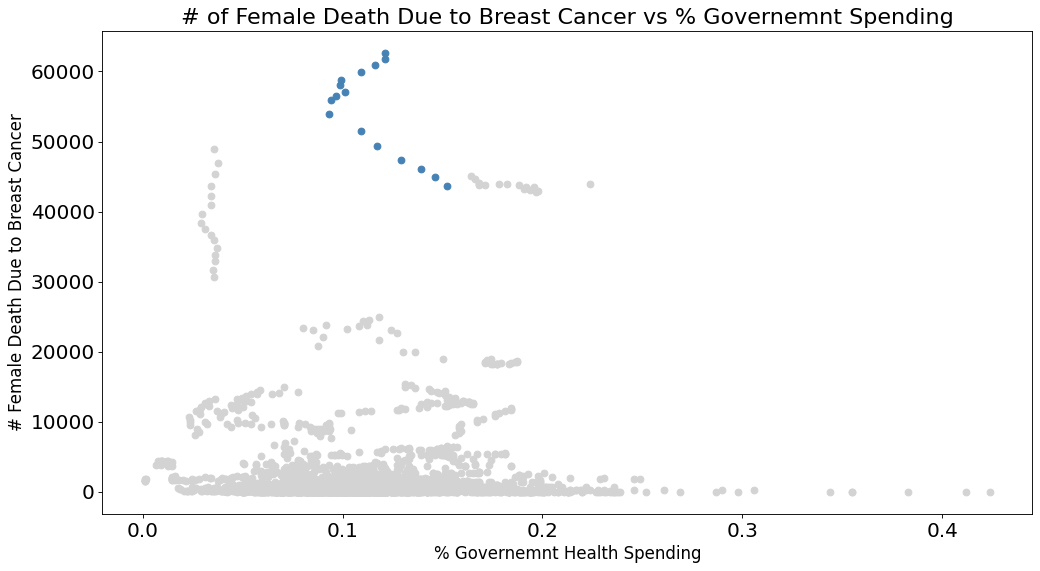

In [48]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(15,8), dpi=80)

for c in country_list:
        
    if c =='China':
        temp = data[data['country']==c]
        plt.scatter(temp['government_health_spending_of_total_gov_spending_percent'], 
                    temp['breast_cancer_number_of_female_deaths'], color='steelblue');

    else:
        temp = data[data['country']==c]
        plt.scatter(temp['government_health_spending_of_total_gov_spending_percent'],
                    temp['breast_cancer_number_of_female_deaths'], color='lightgrey');
        

# Altering Plot Labels
plt.xlabel('% Governemnt Health Spending', fontsize=15) # Add x axis label
plt.ylabel('# Female Death Due to Breast Cancer', fontsize=15) # Add y axis label
plt.xticks(fontsize=18) # Change x tick mark size
plt.yticks(fontsize=18) # Change y tick mark size
plt.title('# of Female Death Due to Breast Cancer vs % Governemnt Spending', 
          fontdict = {'fontsize' : 20}); # Add plot title

plt.savefig("# of Female Death Due to Breast Cancer vs % Governemnt Spending.png")

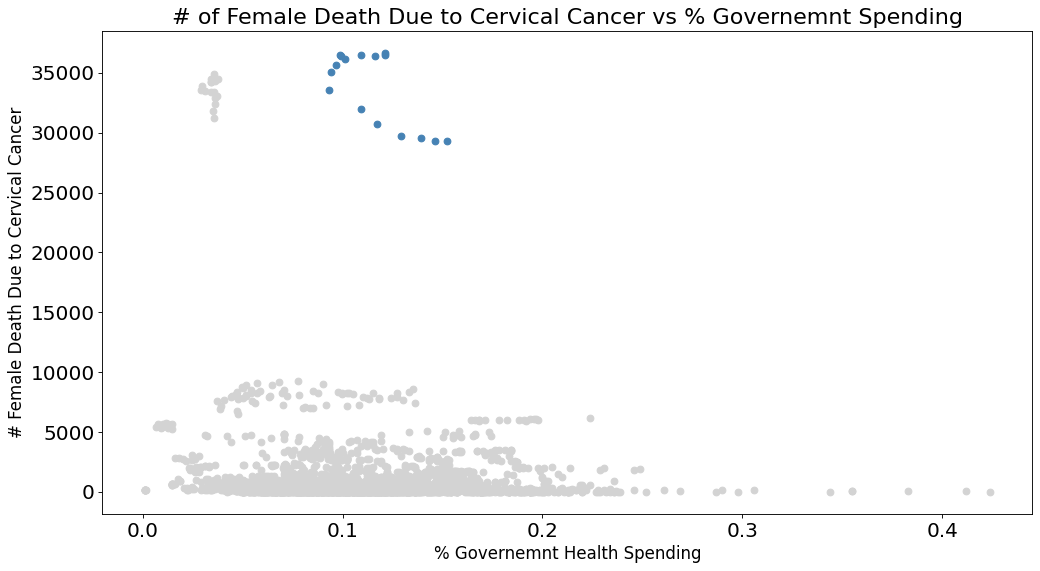

In [49]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(15,8), dpi=80)

for c in country_list:
        
    if c =='China':
        temp = data[data['country']==c]
        plt.scatter(temp['government_health_spending_of_total_gov_spending_percent'], 
                    temp['cervical_cancer_number_of_female_deaths'], color='steelblue');

    else:
        temp = data[data['country']==c]
        plt.scatter(temp['government_health_spending_of_total_gov_spending_percent'],
                    temp['cervical_cancer_number_of_female_deaths'], color='lightgrey');
        

# Altering Plot Labels
plt.xlabel('% Governemnt Health Spending', fontsize=15) # Add x axis label
plt.ylabel('# Female Death Due to Cervical Cancer', fontsize=15) # Add y axis label
plt.xticks(fontsize=18) # Change x tick mark size
plt.yticks(fontsize=18) # Change y tick mark size
plt.title('# of Female Death Due to Cervical Cancer vs % Governemnt Spending', 
          fontdict = {'fontsize' : 20}); # Add plot title

plt.savefig("# of Female Death Due to Cervical Cancer vs % Governemnt Spending.png")

In [50]:
data_China = data[data['country'] == 'China']

In [51]:
data_China.head()

,index,country,year,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths,stomach_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_male_deaths,liver_cancer_number_of_male_deaths,lung_cancer_number_of_male_deaths,stomach_cancer_number_of_male_deaths,government_health_spending_of_total_gov_spending_percent,medical_doctors_per_1000_people,children_per_woman_total_fertility,births_attended_by_skilled_health_staff_percent_of_total,contraceptive_use_percent_of_women_ages_15_49,maternal_deaths_total_number,stillbirths_per_1000_births,body_mass_index_bmi_men_kgperm2,body_mass_index_bmi_women_kgperm2,female_agriculture_workers_percent_of_female_employment,male_agriculture_workers_percent_of_male_employment,literacy_rate_adult_female_percent_of_females_ages_15_above,population_total,cervical_cancer_deaths_per_100000_women
35,35,China,1990,36800.0,27800.0,36700.0,76700.0,84100.0,110000.0,44400.0,192000.0,184000.0,207000.0,NaN,1.10,2.35,0.940,NaN,25300.0,NaN,21.9,22.1,NaN,NaN,0.681,1.180000e+09,1.180000e+09
222,222,China,1991,38000.0,27800.0,37700.0,78200.0,85800.0,111000.0,45900.0,199000.0,186000.0,207000.0,NaN,1.55,2.19,0.937,NaN,NaN,NaN,21.9,22.1,0.563,0.545,NaN,1.190000e+09,1.190000e+09
409,409,China,1992,39400.0,28100.0,38900.0,80600.0,87800.0,112000.0,47900.0,207000.0,191000.0,211000.0,NaN,1.55,2.02,0.841,0.846,NaN,NaN,22.0,22.1,0.550,0.526,NaN,1.210000e+09,1.210000e+09
596,596,China,1993,40800.0,28600.0,40100.0,83100.0,90800.0,115000.0,49500.0,215000.0,198000.0,215000.0,NaN,1.55,1.87,0.836,NaN,NaN,NaN,22.1,22.2,0.531,0.503,NaN,1.220000e+09,1.220000e+09
783,783,China,1994,42200.0,28900.0,41100.0,85900.0,93600.0,116000.0,50800.0,225000.0,207000.0,218000.0,NaN,1.58,1.74,0.904,0.907,NaN,NaN,22.1,22.3,0.525,0.489,NaN,1.230000e+09,1.230000e+09


In [52]:
(data_China.isna().sum(axis=0)/data_China.shape[0]).round(2)

index                                                          0.00
country                                                        0.00
year                                                           0.00
breast_cancer_number_of_female_deaths                          0.10
cervical_cancer_number_of_female_deaths                        0.10
colonandrectum_cancer_number_of_female_deaths                  0.10
liver_cancer_number_of_female_deaths                           0.10
lung_cancer_number_of_female_deaths                            0.10
stomach_cancer_number_of_female_deaths                         0.10
colonandrectum_cancer_number_of_male_deaths                    0.10
liver_cancer_number_of_male_deaths                             0.10
lung_cancer_number_of_male_deaths                              0.10
stomach_cancer_number_of_male_deaths                           0.10
government_health_spending_of_total_gov_spending_percent       0.47
medical_doctors_per_1000_people                 

In [53]:
data_China

,index,country,year,breast_cancer_number_of_female_deaths,cervical_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_female_deaths,liver_cancer_number_of_female_deaths,lung_cancer_number_of_female_deaths,stomach_cancer_number_of_female_deaths,colonandrectum_cancer_number_of_male_deaths,liver_cancer_number_of_male_deaths,lung_cancer_number_of_male_deaths,stomach_cancer_number_of_male_deaths,government_health_spending_of_total_gov_spending_percent,medical_doctors_per_1000_people,children_per_woman_total_fertility,births_attended_by_skilled_health_staff_percent_of_total,contraceptive_use_percent_of_women_ages_15_49,maternal_deaths_total_number,stillbirths_per_1000_births,body_mass_index_bmi_men_kgperm2,body_mass_index_bmi_women_kgperm2,female_agriculture_workers_percent_of_female_employment,male_agriculture_workers_percent_of_male_employment,literacy_rate_adult_female_percent_of_females_ages_15_above,population_total,cervical_cancer_deaths_per_100000_women
35,35,China,1990,36800.0,27800.0,36700.0,76700.0,84100.0,110000.0,44400.0,192000.0,184000.0,207000.0,NaN,1.10,2.35,0.940,NaN,25300.0,NaN,21.9,22.1,NaN,NaN,0.681,1.180000e+09,1.180000e+09
222,222,China,1991,38000.0,27800.0,37700.0,78200.0,85800.0,111000.0,45900.0,199000.0,186000.0,207000.0,NaN,1.55,2.19,0.937,NaN,NaN,NaN,21.9,22.1,0.563,0.545,NaN,1.190000e+09,1.190000e+09
409,409,China,1992,39400.0,28100.0,38900.0,80600.0,87800.0,112000.0,47900.0,207000.0,191000.0,211000.0,NaN,1.55,2.02,0.841,0.846,NaN,NaN,22.0,22.1,0.550,0.526,NaN,1.210000e+09,1.210000e+09
596,596,China,1993,40800.0,28600.0,40100.0,83100.0,90800.0,115000.0,49500.0,215000.0,198000.0,215000.0,NaN,1.55,1.87,0.836,NaN,NaN,NaN,22.1,22.2,0.531,0.503,NaN,1.220000e+09,1.220000e+09
783,783,China,1994,42200.0,28900.0,41100.0,85900.0,93600.0,116000.0,50800.0,225000.0,207000.0,218000.0,NaN,1.58,1.74,0.904,0.907,NaN,NaN,22.1,22.3,0.525,0.489,NaN,1.230000e+09,1.230000e+09
970,970,China,1995,43600.0,29300.0,42100.0,88600.0,96400.0,117000.0,51400.0,231000.0,211000.0,217000.0,0.1520,1.17,1.64,0.893,0.904,14700.0,NaN,22.2,22.3,0.517,0.476,NaN,1.240000e+09,1.240000e+09
1157,1157,China,1996,44900.0,29300.0,42900.0,90300.0,100000.0,117000.0,52500.0,239000.0,220000.0,217000.0,0.1460,1.17,1.57,0.931,0.911,NaN,NaN,22.3,22.4,0.508,0.463,NaN,1.250000e+09,1.250000e+09
1344,1344,China,1997,46100.0,29600.0,44000.0,92100.0,104000.0,117000.0,54100.0,247000.0,229000.0,220000.0,0.1390,1.19,1.53,0.938,0.838,NaN,NaN,22.4,22.4,0.499,0.449,NaN,1.260000e+09,1.260000e+09
1531,1531,China,1998,47400.0,29700.0,45100.0,93900.0,108000.0,118000.0,55700.0,255000.0,239000.0,224000.0,0.1290,1.18,1.50,NaN,NaN,NaN,NaN,22.4,22.5,0.495,0.439,NaN,1.270000e+09,1.270000e+09
1718,1718,China,1999,49300.0,30700.0,46400.0,95500.0,112000.0,120000.0,57800.0,261000.0,251000.0,230000.0,0.1170,1.21,1.49,0.968,0.830,NaN,NaN,22.5,22.6,0.485,0.426,NaN,1.280000e+09,1.280000e+09


0.927 in 2010, 0.865 in 2020, 0.681 in 1990

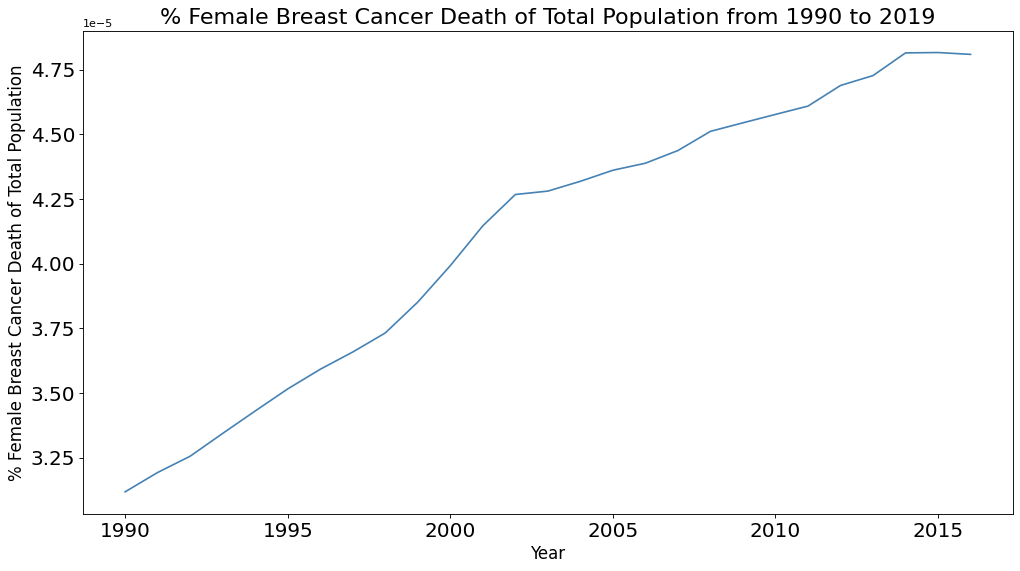

In [54]:
data_China["%female_breast_cancer_death_total_population"] = data_China['breast_cancer_number_of_female_deaths']/data_China['population_total']

plt.style.use('tableau-colorblind10')
plt.figure(figsize=(15,8), dpi=80)

plt.plot(data_China['year'],
         data_China['%female_breast_cancer_death_total_population'], 
         color='steelblue')
plt.xlabel('Year', fontsize=15) # Add x axis label
plt.ylabel('% Female Breast Cancer Death of Total Population', fontsize=15) # Add y axis label
plt.xticks(fontsize=18) # Change x tick mark size
plt.yticks(fontsize=18) # Change y tick mark size
plt.title('% Female Breast Cancer Death of Total Population from 1990 to 2019', 
          fontdict = {'fontsize' : 20}); # Add plot title

plt.savefig("% Female Breast Cancer Death of Total Population from 1990 to 2019.png")

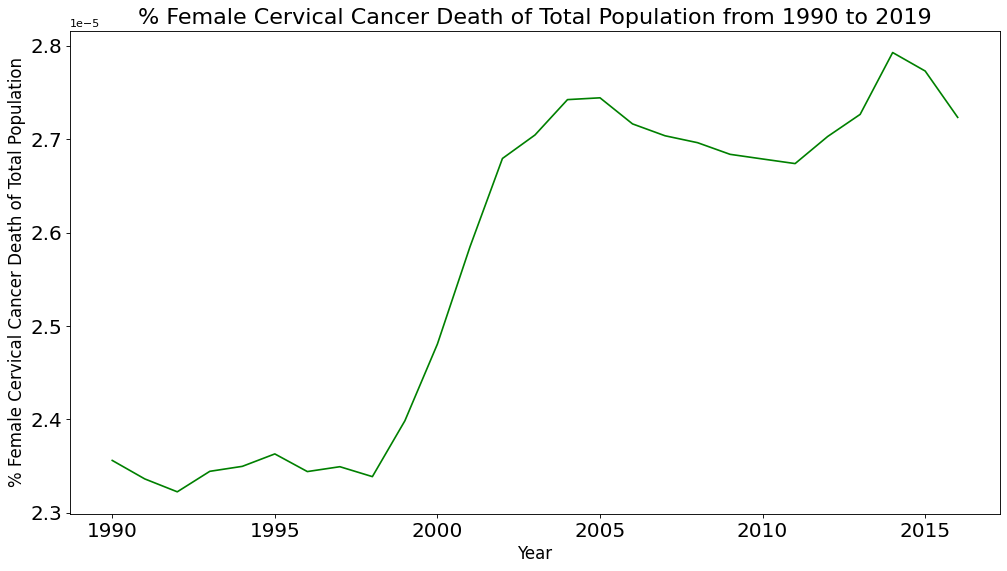

In [55]:
data_China["%female_cervical_cancer_death_total_population"] = data_China['cervical_cancer_number_of_female_deaths']/data_China['population_total']

plt.style.use('tableau-colorblind10')
plt.figure(figsize=(15,8), dpi=80)

plt.plot(data_China['year'],
         data_China['%female_cervical_cancer_death_total_population'], 
         color='green')
plt.xlabel('Year', fontsize=15) # Add x axis label
plt.ylabel('% Female Cervical Cancer Death of Total Population', fontsize=15) # Add y axis label
plt.xticks(fontsize=18) # Change x tick mark size
plt.yticks(fontsize=18) # Change y tick mark size
plt.title('% Female Cervical Cancer Death of Total Population from 1990 to 2019', 
          fontdict = {'fontsize' : 20}); # Add plot title

plt.savefig("% Female Cervical Cancer Death of Total Population from 1990 to 2019.png")

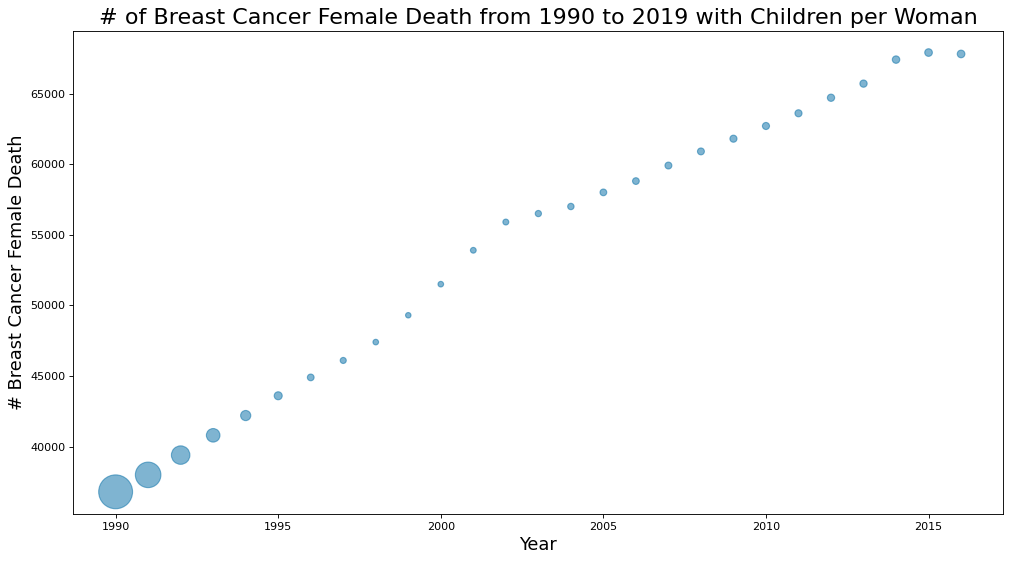

In [56]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(15,8), dpi=80)


plt.scatter(x=data_China['year'],
             y=data_China['breast_cancer_number_of_female_deaths'],
             alpha=0.5,
             s = data_China['children_per_woman_total_fertility']**8);

# Altering Plot Labels
plt.xlabel('Year', fontsize=16)
plt.ylabel('# Breast Cancer Female Death', fontsize=16)
plt.title('# of Breast Cancer Female Death from 1990 to 2019 with Children per Woman', fontdict = {'fontsize' : 20});

plt.savefig("# of Breast Cancer Female Death from 1990 to 2019 with Children per Woman.png")



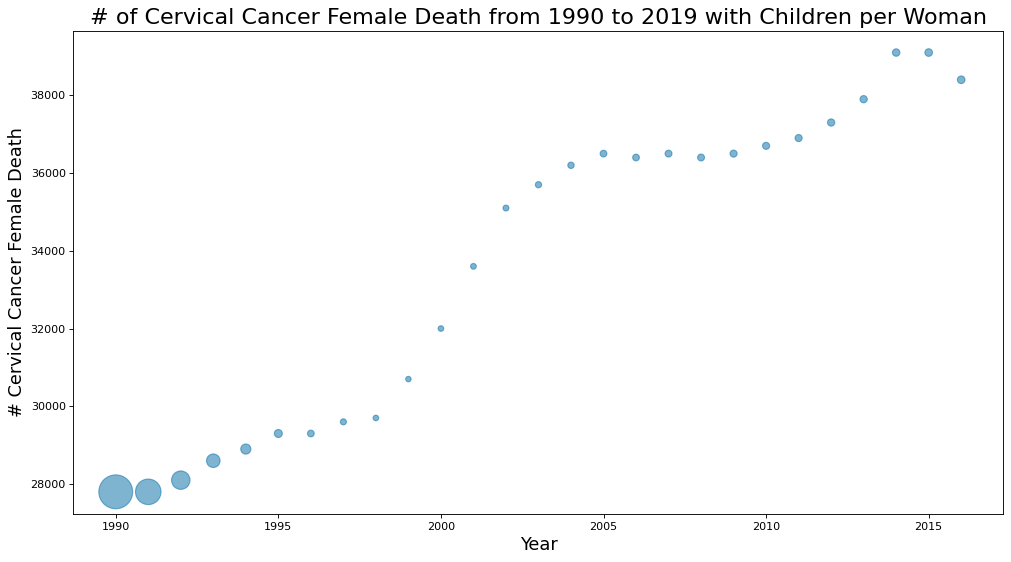

In [57]:
plt.style.use('tableau-colorblind10')
plt.figure(figsize=(15,8), dpi=80)


plt.scatter(x=data_China['year'],
             y=data_China['cervical_cancer_number_of_female_deaths'],
             alpha=0.5,
             s = data_China['children_per_woman_total_fertility']**8);

# Altering Plot Labels
plt.xlabel('Year', fontsize=16)
plt.ylabel('# Cervical Cancer Female Death', fontsize=16)
plt.title('# of Cervical Cancer Female Death from 1990 to 2019 with Children per Woman', fontdict = {'fontsize' : 20});

plt.savefig("# of Cervical Cancer Female Death from 1990 to 2019 with Children per Woman.png")
